# Mastercamp Data Science Project

## Préparation des données

Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [31]:
df = pd.read_csv('assets/valeursfoncieres-2022.txt', sep='|', low_memory=True, dtype=str)

In [32]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,24,1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,140,3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510


In [33]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)

Shape:  (3803885, 43)
Columns:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


In [34]:
to_drop = df.columns[df.isnull().all()]
print('Columns with only NaN: ', to_drop)

Columns with only NaN:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'Identifiant local'],
      dtype='object')


In [35]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,NaN,RUE,2280,DE LA LIBERTE,1000,...,NaN,NaN,1,2,Appartement,24,1,NaN,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88
3,000001,03/01/2022,Vente,"143000,00",98,NaN,RTE,0055,DE LA DOMBES,1480,...,NaN,NaN,1,2,Appartement,140,3,NaN,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510


In [36]:
print('Number of rows with at least one missing value: ', df.isnull().any(axis=1).sum())

Number of rows with at least one missing value:  3803885


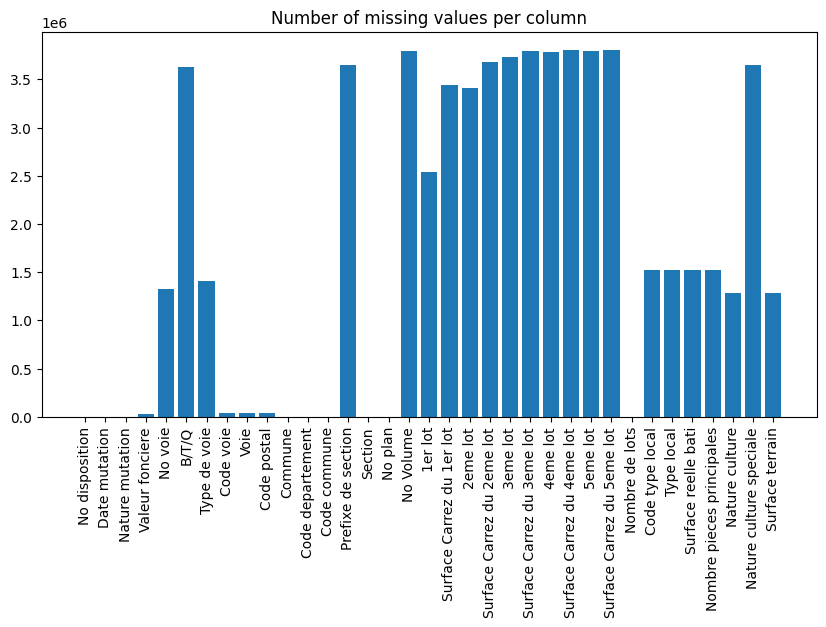

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

On garde seulement les colonnes avec moins de 2 millions de données nulles

In [38]:
to_drop = df.columns[df.isnull().sum() > 2000000]
print('Columns with more than 2 million missing values: ', to_drop)

df.drop(to_drop, axis=1, inplace=True)
print('Shape: ', df.shape)
print('Columns: ', df.columns)

Columns with more than 2 million missing values:  Index(['B/T/Q', 'Prefixe de section', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nature culture speciale'],
      dtype='object')
Shape:  (3803885, 21)
Columns:  Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Section', 'No plan',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Surface terrain'],
      dtype='object')


In [39]:
df[df['Surface reelle bati'].isnull()].head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,...,398,ZE,184,0,NaN,NaN,NaN,NaN,S,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,...,398,ZE,185,0,NaN,NaN,NaN,NaN,S,88
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480,MESSIMY SUR SAONE,...,243,A,643,0,NaN,NaN,NaN,NaN,T,510
6,000001,06/01/2022,Vente,"255000,00",NaN,NaN,B047,LA FREGONIERE,1560,MANTENAY-MONTLIN,...,230,ZM,126,0,NaN,NaN,NaN,NaN,S,360
7,000001,03/01/2022,Vente,"525000,00",NaN,PL,0300,DE LA CROIX BLANCHE,1390,SAINT-ANDRE-DE-CORCY,...,333,AN,23,0,NaN,NaN,NaN,NaN,S,50
10,000001,05/01/2022,Vente,"254200,00",NaN,NaN,B036,MAS ROLLAND,1700,SAINT-MAURICE-DE-BEYNOST,...,376,AC,589,0,NaN,NaN,NaN,NaN,AB,784
14,000001,03/01/2022,Vente,"140000,00",NaN,RUE,0397,DE BEAUGENCY,1000,BOURG-EN-BRESSE,...,53,BZ,223,0,NaN,NaN,NaN,NaN,AG,260
15,000001,03/01/2022,Vente,"140000,00",NaN,RUE,0397,DE BEAUGENCY,1000,BOURG-EN-BRESSE,...,53,BZ,224,0,NaN,NaN,NaN,NaN,AG,590
16,000001,03/01/2022,Vente,"140000,00",NaN,RUE,0397,DE BEAUGENCY,1000,BOURG-EN-BRESSE,...,53,BZ,241,0,NaN,NaN,NaN,NaN,AG,262
20,000001,10/01/2022,Vente,"580000,00",NaN,NaN,B092,COUTELIEU,1500,AMBRONAY,...,7,ZN,519,0,NaN,NaN,NaN,NaN,S,27


In [40]:
df[df['Surface terrain'].isnull()].head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,...,53,AM,102,1,2,Appartement,24,1,NaN,NaN
3,000001,03/01/2022,Vente,"143000,00",98,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,...,398,ZE,187,1,2,Appartement,140,3,NaN,NaN
11,000001,05/01/2022,Vente,"64000,00",12,BD,0620,DE BROU,1000,BOURG-EN-BRESSE,...,53,BC,223,1,2,Appartement,117,2,NaN,NaN
12,000001,05/01/2022,Vente,"64000,00",12,BD,0620,DE BROU,1000,BOURG-EN-BRESSE,...,53,BC,223,1,3,Dépendance,0,0,NaN,NaN
17,000001,04/01/2022,Vente,"134000,00",13,RUE,1070,DE CUIRON,1000,BOURG-EN-BRESSE,...,53,CS,321,1,3,Dépendance,0,0,NaN,NaN
18,000001,04/01/2022,Vente,"134000,00",13,RUE,1070,DE CUIRON,1000,BOURG-EN-BRESSE,...,53,CS,321,1,2,Appartement,46,1,NaN,NaN
19,000001,04/01/2022,Vente,"134000,00",13,RUE,1070,DE CUIRON,1000,BOURG-EN-BRESSE,...,53,CS,321,1,3,Dépendance,0,0,NaN,NaN
26,000001,04/01/2022,Vente,"138000,00",2,RUE,0394,JEAN MACE,1500,AMBERIEU-EN-BUGEY,...,4,AN,491,1,3,Dépendance,0,0,NaN,NaN
27,000001,04/01/2022,Vente,"138000,00",2,RUE,0394,JEAN MACE,1500,AMBERIEU-EN-BUGEY,...,4,AN,491,3,3,Dépendance,0,0,NaN,NaN
28,000001,04/01/2022,Vente,"138000,00",2,RUE,0394,JEAN MACE,1500,AMBERIEU-EN-BUGEY,...,4,AN,491,1,3,Dépendance,0,0,NaN,NaN


Toutes les données ne possédant aucune surface

In [41]:
print('All missing values in Surface reelle bati and also missing in Surface terrain: ', df[(df['Surface reelle bati'].isnull()) & (df['Surface terrain'].isnull())].shape[0])

All missing values in Surface reelle bati and also missing in Surface terrain:  217157


On change les acronymes en leur forme non contractée

In [42]:
print('All possible values in "Nature culture": ', df['Nature culture'].unique())

All possible values in "Nature culture":  [nan 'S' 'T' 'AB' 'AG' 'P' 'VI' 'L' 'J' 'BS' 'BT' 'BR' 'BP' 'PA' 'BM' 'CH'
 'E' 'BF' 'VE' 'B' 'CA' 'PP' 'PC' 'BO' 'TP' 'LB' 'PH' 'PE']


In [43]:
mapping = {
    'T': 'Terres',
    'TE': 'Terres plantées',
    'P': 'Prés',
    'PA': 'Pâturages',
    'PC': 'Pacages',
    'PE': 'Pré d\'embouchure',
    'PH': 'Herbages',
    'PP': 'Pré plantes',
    'VE': 'Vergers',
    'VI': 'Vignes',
    'B': 'Bois',
    'BF': 'Futaies feuillues',
    'BM': 'Futaies mixtes',
    'BO': 'Oseraies',
    'BP': 'Peupleraies',
    'BR': 'Futaies résineuses',
    'BS': 'Taillis sous futaie',
    'BT': 'Taillis simples',
    'L': 'Landes',
    'LB': 'Landes boisées',
    'CA': 'Carrières',
    'E': 'Eaux',
    'J': 'Jardins',
    'AB': 'Terrains à bâtir',
    'AG': 'Terrains d\'agréments',
    'CH': 'Chemin de fer',
    'S': 'Sols'
}

df['Nature culture'] = df['Nature culture'].map(mapping)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,...,53,AM,102,1,2,Appartement,24,1,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,...,398,ZE,184,0,NaN,NaN,NaN,NaN,Sols,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,...,398,ZE,185,0,NaN,NaN,NaN,NaN,Sols,88
3,000001,03/01/2022,Vente,"143000,00",98,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,...,398,ZE,187,1,2,Appartement,140,3,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480,MESSIMY SUR SAONE,...,243,A,643,0,NaN,NaN,NaN,NaN,Terres,510


On merge les colonnes de type immobilier ensemble, ainsi que les surfaces

In [44]:
df['Surface'] = df['Surface reelle bati'].fillna(0).astype(float) + df['Surface terrain'].fillna(0).astype(float)
df.drop(['Surface reelle bati', 'Surface terrain'], axis=1, inplace=True)

df['Type immobilier'] = df['Nature culture'].fillna('') + df['Type local'].fillna('')
df.drop(['Nature culture', 'Type local'], axis=1, inplace=True)

In [45]:
df.shape

(3803885, 19)

On s'occupe maintenant des valeurs nulles restantes

In [46]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Nombre pieces principales,Surface,Type immobilier
0,000001,03/01/2022,Vente,"55000,00",13,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,01,53,AM,102,1,2,1,24.0,Appartement
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,01,398,ZE,184,0,NaN,NaN,84.0,Sols
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,01,398,ZE,185,0,NaN,NaN,88.0,Sols
3,000001,03/01/2022,Vente,"143000,00",98,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,01,398,ZE,187,1,2,3,140.0,Appartement
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480,MESSIMY SUR SAONE,01,243,A,643,0,NaN,NaN,510.0,Terres


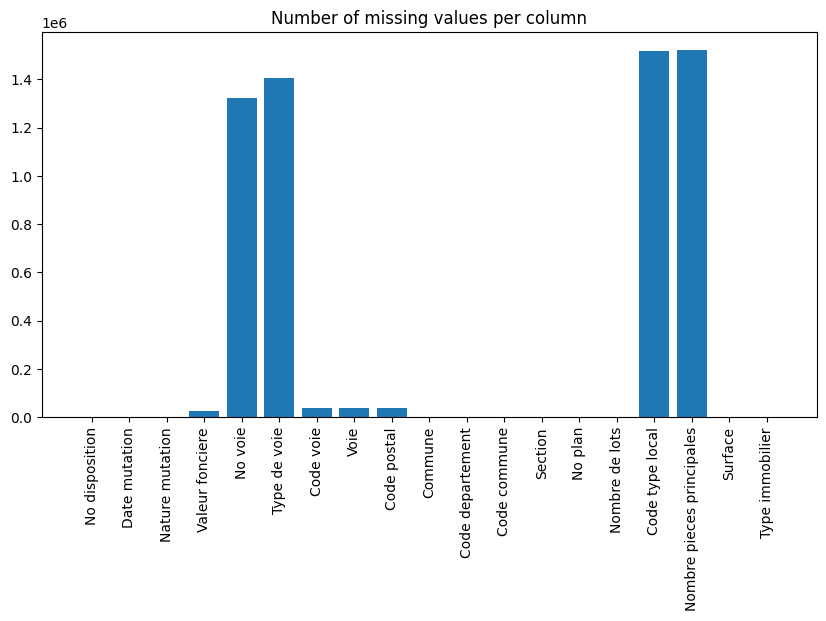

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

In [48]:
df['No voie'] = df['No voie'].fillna(0).astype(int)
df['Nombre de lots'] = df['Nombre de lots'].fillna(0).astype(int)
df['Nombre pieces principales'] = df['Nombre pieces principales'].fillna(0).astype(int)
df['Type de voie'] = df['Type de voie'].fillna('')
df.drop(['Code type local'], axis=1, inplace=True)
df.dropna(inplace=True)

In [49]:
print('Number of missing values: ', df.isnull().sum().sum())

Number of missing values:  0


In [50]:
df.shape

(3739782, 18)

On met la valeur foncière en target

In [51]:
df = df[[c for c in df if c not in ['Valeur fonciere']] + ['Valeur fonciere']]
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)


## Graphiques et analyses

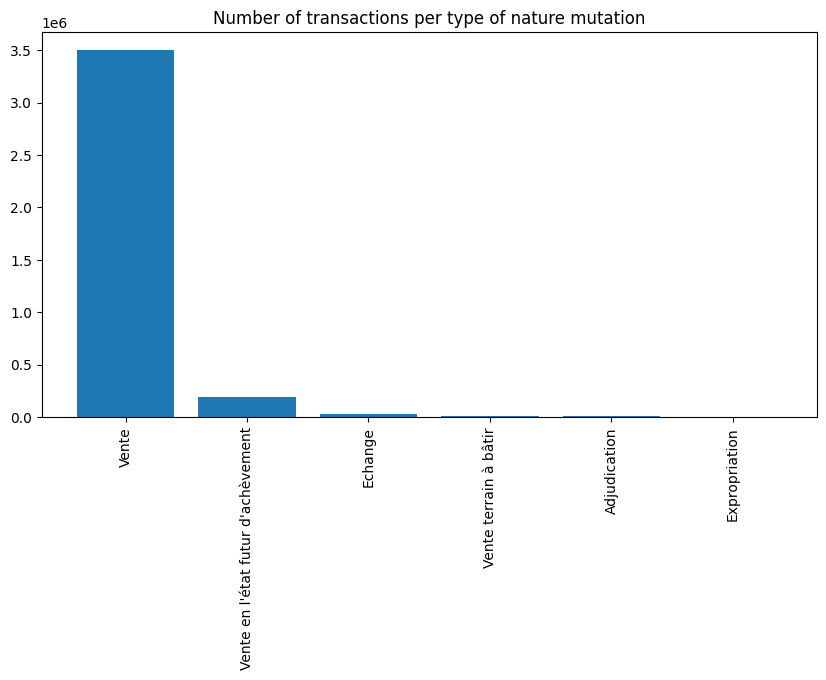

In [52]:
plt.figure(figsize=(10, 5))
plt.bar(df['Nature mutation'].value_counts().index, df['Nature mutation'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number of transactions per type of nature mutation')
plt.show()

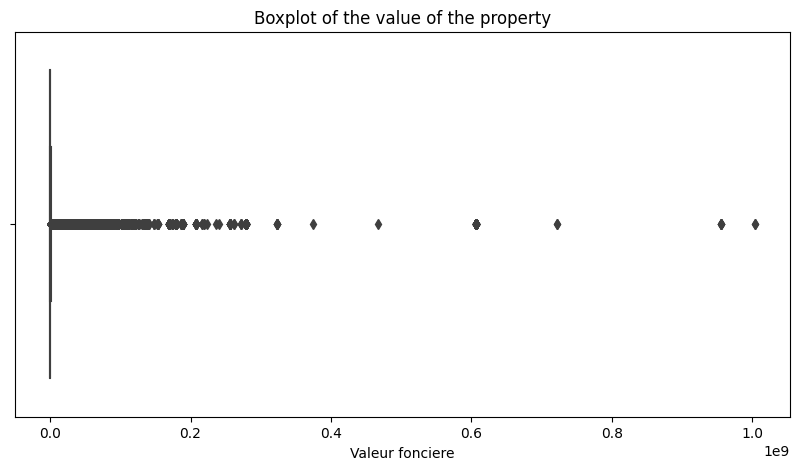

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Valeur fonciere'])
plt.title('Boxplot of the value of the property')
plt.show()

Mean:  674846.0328216323
Standard deviation:  5498679.465799136
Minimum:  0.01
Maximum:  1003401470.0
90th percentile:  619010.0
10th percentile:  15000.0


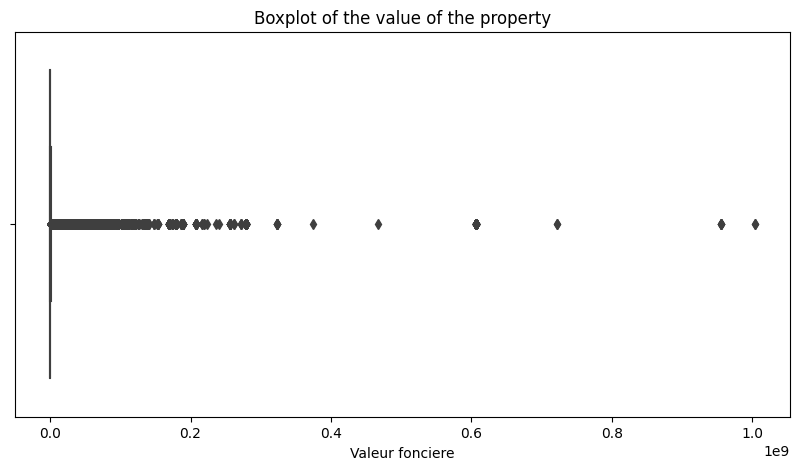

In [54]:
print('Mean: ', df['Valeur fonciere'].mean())
print('Standard deviation: ', df['Valeur fonciere'].std())
print('Minimum: ', df['Valeur fonciere'].min())
print('Maximum: ', df['Valeur fonciere'].max())
print('90th percentile: ', df['Valeur fonciere'].quantile(0.90))
print('10th percentile: ', df['Valeur fonciere'].quantile(0.10))

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Valeur fonciere'])
plt.title('Boxplot of the value of the property')
plt.show()

In [55]:
df = df[(df['Valeur fonciere'] < df['Valeur fonciere'].quantile(0.90)) & (df['Valeur fonciere'] > df['Valeur fonciere'].quantile(0.10))]

## Heat map and EDA

In [56]:
df.describe()

,No voie,Nombre de lots,Nombre pieces principales,Surface,Valeur fonciere
count,2.980467e+06,2.980467e+06,2.980467e+06,2.980467e+06,2.980467e+06
mean,4.589545e+02,5.161017e-01,1.182471e+00,1.456014e+03,2.037023e+05
std,1.638540e+03,8.293896e-01,1.866856e+00,7.235046e+03,1.353701e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500009e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,9.945000e+04
50%,1.000000e+01,0.000000e+00,0.000000e+00,2.150000e+02,1.760000e+05
75%,4.800000e+01,1.000000e+00,2.000000e+00,7.660000e+02,2.800000e+05
max,9.999000e+03,9.300000e+01,9.000000e+01,3.760096e+06,6.190000e+05


C:\Users\Mrics\AppData\Local\Temp\ipykernel_14436\2212712866.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Mrics\AppData\Local\Temp\ipykernel_14436\2212712866.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




KeyboardInterrupt: 

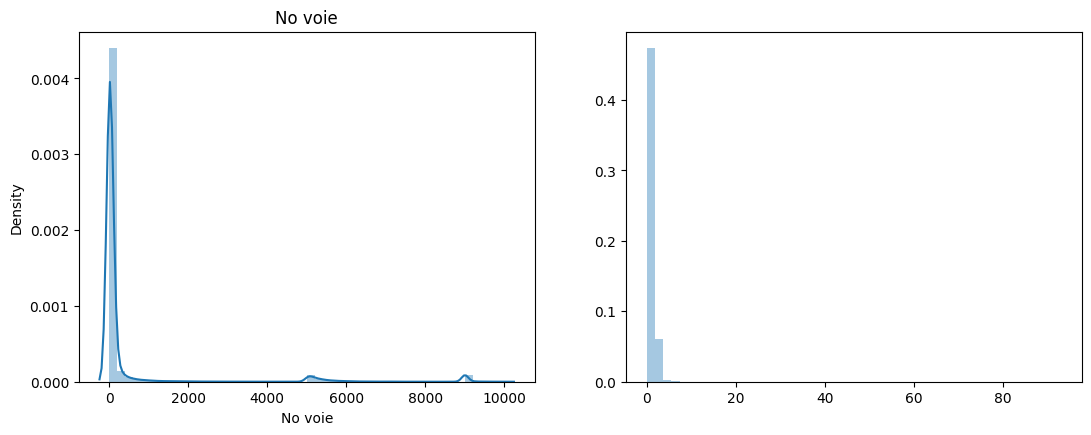

In [29]:
# Distribution de toutes les valeurs numériques sauf No voie

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[[c for c in df if c not in ['No voie']]], orient='h')
plt.title('Boxplot of all numerical values')
plt.show()

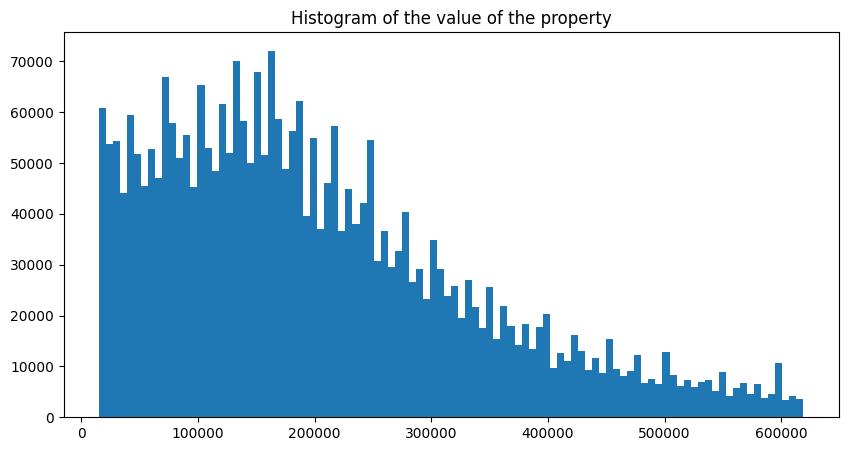

In [29]:
# Histograms de la valeur foncière

plt.figure(figsize=(10, 5))
plt.hist(df['Valeur fonciere'], bins=100)
plt.title('Histogram of the value of the property')
plt.show()



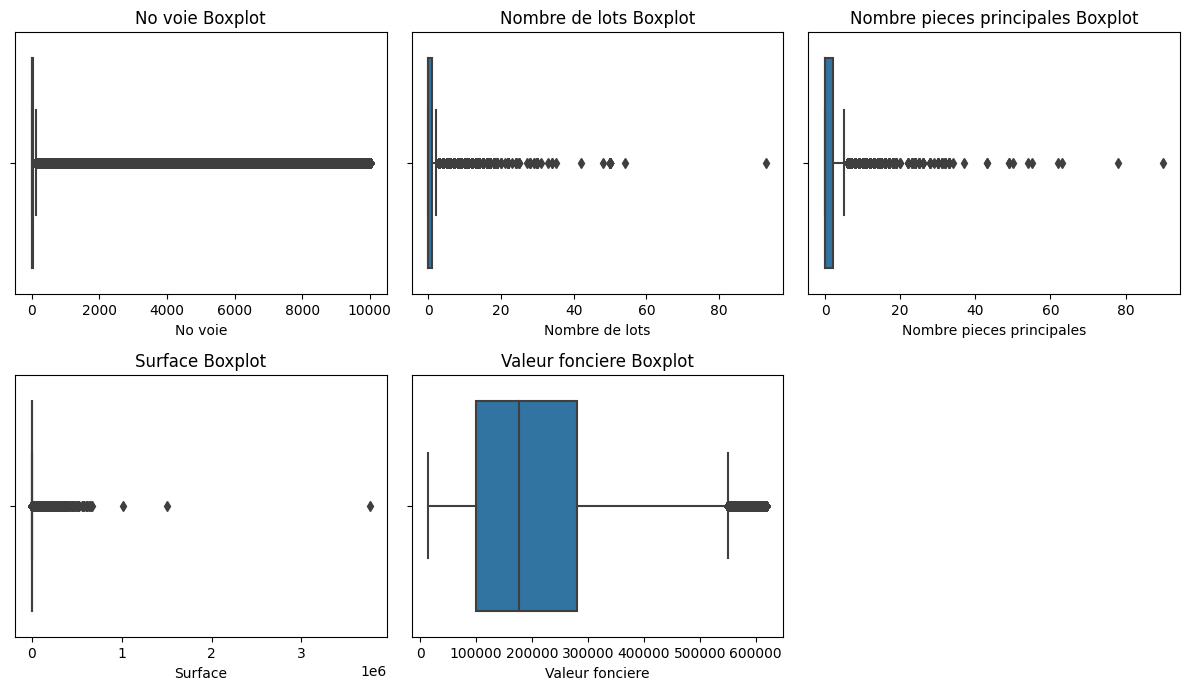

In [30]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

## Modèles

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type immobilier'] = le.fit_transform(df['Type immobilier'])
df['Type de voie'] = le.fit_transform(df['Type de voie'])
df['Code departement'] = le.fit_transform(df['Code departement'])
df['Code commune'] = le.fit_transform(df['Code commune'])
df['Nature mutation'] = le.fit_transform(df['Nature mutation'])
df['Section'] = le.fit_transform(df['Section'])
df['Commune'] = le.fit_transform(df['Commune'])
df['Voie'] = le.fit_transform(df['Voie'])
df['Code voie'] = le.fit_transform(df['Code voie'])
df['Date mutation'] = le.fit_transform(df['Date mutation'])

df.head()

,No disposition,Date mutation,Nature mutation,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Nombre pieces principales,Surface,Type immobilier,Valeur fonciere
0,000001,22,3,13,105,2279,75745,1000,3513,0,478,13,102,1,1,24.0,1,55000.0
1,000001,22,3,0,0,9856,30147,1480,25343,0,331,558,184,0,0,84.0,87,143000.0
2,000001,22,3,0,0,9856,30147,1480,25343,0,331,558,185,0,0,88.0,87,143000.0
3,000001,22,3,98,104,54,72115,1480,25343,0,331,558,187,1,3,140.0,1,143000.0
5,000001,57,3,282,104,129,89483,1560,15794,0,146,566,124,0,5,757.0,91,255000.0


In [30]:
from sklearn.model_selection import train_test_split

X = df[[c for c in df if c not in ['Valeur fonciere']] + ['Valeur fonciere']]
y = df['Valeur fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2384373, 18), (2384373,), (596094, 18), (596094,))

In [31]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression score: ', lr.score(X_test, y_test))
print('Spearman correlation: ', spearmanr(lr.predict(X_test), y_test))

Linear Regression score:  1.0
Spearman correlation:  SignificanceResult(statistic=0.9999927989465428, pvalue=0.0)


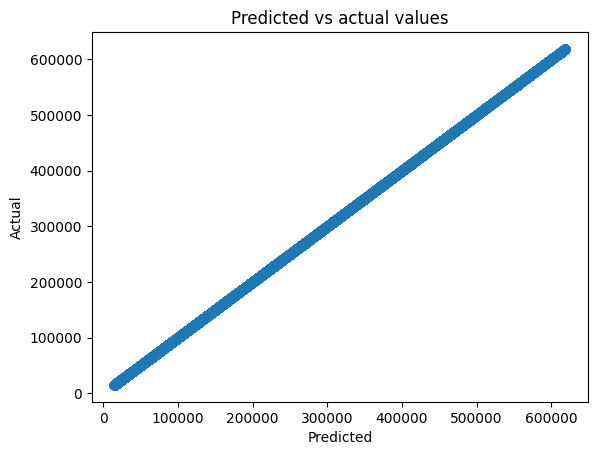

In [32]:
plt.scatter(lr.predict(X_test), y_test)
plt.title('Predicted vs actual values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
def spearman(y_true, y_pred):
    return tf.py_function(spearmanr, (y_pred, y_true), tf.float64)

model.compile(optimizer='adam', loss='mse', metrics=[spearman])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10000, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 7s 32ms/step - loss: 2800969728.0000 - spearman: 0.9398 - val_loss: 1163515.1250 - val_spearman: 0.9999
Epoch 2/10
191/191 [==============================] - 8s 41ms/step - loss: 756995.3125 - spearman: 1.0000 - val_loss: 343572.3750 - val_spearman: 1.0000
Epoch 3/10
191/191 [==============================] - 5s 28ms/step - loss: 315232.8438 - spearman: 1.0000 - val_loss: 220082.9219 - val_spearman: 1.0000
Epoch 4/10
191/191 [==============================] - 5s 28ms/step - loss: 189457.6875 - spearman: 1.0000 - val_loss: 153236.1875 - val_spearman: 1.0000
Epoch 5/10
191/191 [==============================] - 6s 34ms/step - loss: 149260.5312 - spearman: 1.0000 - val_loss: 119647.9531 - val_spearman: 1.0000
Epoch 6/10
191/191 [==============================] - 6s 31ms/step - loss: 108960.0156 - spearman: 1.0000 - val_loss: 102184.7891 - val_spearman: 1.0000
Epoch 7/10
191/191 [==============================] - 7s 34ms/step - loss: 90

In [ ]:
print('Neural Network score: ', model.evaluate(X_test, y_test))

18628/18628 [==============================] - 62s 3ms/step - loss: 55658.1836 - spearman: 0.9999
Neural Network score:  [55658.18359375, 0.9998992681503296]


18628/18628 [==============================] - 27s 1ms/step


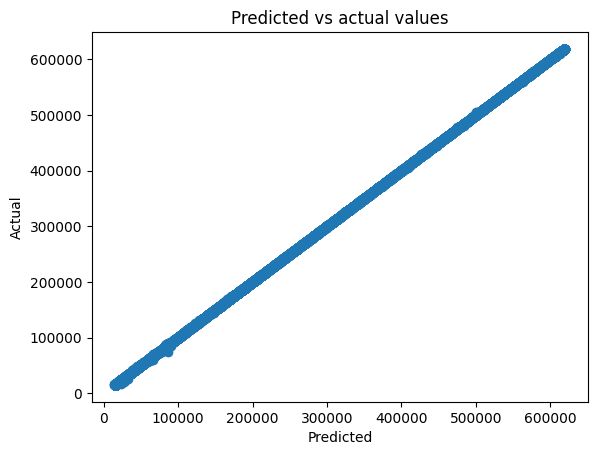

In [ ]:
plt.scatter(model.predict(X_test), y_test)
plt.title('Predicted vs actual values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#